# Convex Hull

Link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html

In [ ]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
rng = np.random.default_rng()
points = rng.random((30, 2))   # 30 random points in 2-D
hull = ConvexHull(points)

In [ ]:
points

array([[0.13790126, 0.59594774],
       [0.58677258, 0.78394582],
       [0.94010474, 0.16174934],
       [0.94406197, 0.86880372],
       [0.87923802, 0.28518638],
       [0.82166387, 0.93616837],
       [0.10735092, 0.0306339 ],
       [0.57728653, 0.31474882],
       [0.2106339 , 0.48186365],
       [0.99484233, 0.76913759],
       [0.32107688, 0.27009725],
       [0.15562045, 0.22387469],
       [0.59746888, 0.07625883],
       [0.10758157, 0.75629528],
       [0.00627805, 0.42662116],
       [0.54976667, 0.63289833],
       [0.05944566, 0.64666012],
       [0.36837392, 0.41900851],
       [0.04875062, 0.23847517],
       [0.0911612 , 0.86146898],
       [0.86577588, 0.91865493],
       [0.00110663, 0.38502176],
       [0.22463472, 0.55862531],
       [0.83321589, 0.49802083],
       [0.80945675, 0.9890236 ],
       [0.07379938, 0.62921877],
       [0.31937827, 0.02557451],
       [0.45832239, 0.99559639],
       [0.8639159 , 0.39063717],
       [0.87528644, 0.01341116]])

In [ ]:
hull

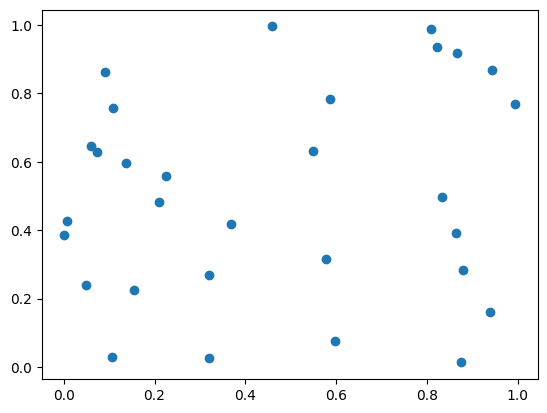

In [ ]:
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')

In [ ]:
points

array([[0.13790126, 0.59594774],
       [0.58677258, 0.78394582],
       [0.94010474, 0.16174934],
       [0.94406197, 0.86880372],
       [0.87923802, 0.28518638],
       [0.82166387, 0.93616837],
       [0.10735092, 0.0306339 ],
       [0.57728653, 0.31474882],
       [0.2106339 , 0.48186365],
       [0.99484233, 0.76913759],
       [0.32107688, 0.27009725],
       [0.15562045, 0.22387469],
       [0.59746888, 0.07625883],
       [0.10758157, 0.75629528],
       [0.00627805, 0.42662116],
       [0.54976667, 0.63289833],
       [0.05944566, 0.64666012],
       [0.36837392, 0.41900851],
       [0.04875062, 0.23847517],
       [0.0911612 , 0.86146898],
       [0.86577588, 0.91865493],
       [0.00110663, 0.38502176],
       [0.22463472, 0.55862531],
       [0.83321589, 0.49802083],
       [0.80945675, 0.9890236 ],
       [0.07379938, 0.62921877],
       [0.31937827, 0.02557451],
       [0.45832239, 0.99559639],
       [0.8639159 , 0.39063717],
       [0.87528644, 0.01341116]])

In [ ]:
arr = np.array([1,2,3,4])
ar = np.array([1,2])

arr[ar]

array([2, 3])

In [ ]:
hull.simplices[0]

array([ 6, 21], dtype=int32)

In [ ]:
points[hull.simplices[0]]

array([[0.10735092, 0.0306339 ],
       [0.00110663, 0.38502176]])

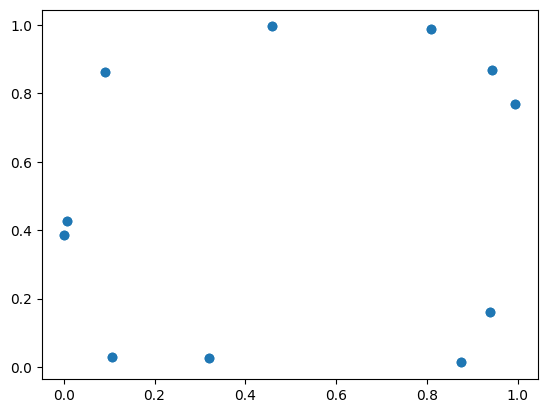

In [ ]:
plt.scatter(points[hull.simplices, 0], points[hull.simplices, 1])

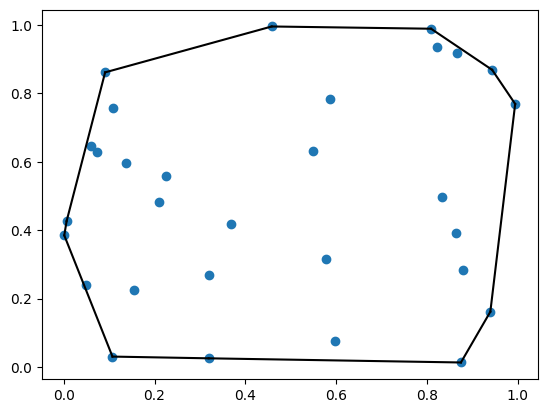

In [ ]:
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

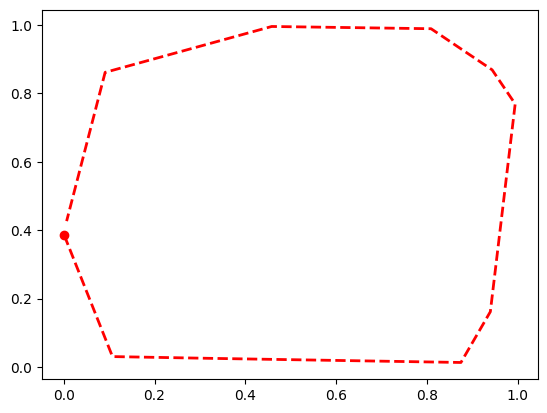

In [ ]:
plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')
plt.show()

Basic: https://www.geeksforgeeks.org/convex-hull-using-divide-and-conquer-algorithm/

# Phase Diagram

In [2]:
!pip uninstall pymatgen

Found existing installation: pymatgen 2023.11.10
Uninstalling pymatgen-2023.11.10:
  Would remove:
    /usr/local/bin/feff_plot_cross_section
    /usr/local/bin/feff_plot_dos
    /usr/local/bin/get_environment
    /usr/local/bin/pmg
    /usr/local/lib/python3.10/dist-packages/cmd_line/gulp/Libraries/belashchenko.lib
    /usr/local/lib/python3.10/dist-packages/cmd_line/gulp/Libraries/bks.lib
    /usr/local/lib/python3.10/dist-packages/cmd_line/gulp/Libraries/bresme_water.lib
    /usr/local/lib/python3.10/dist-packages/cmd_line/gulp/Libraries/bush.lib
    /usr/local/lib/python3.10/dist-packages/cmd_line/gulp/Libraries/carbonate.lib
    /usr/local/lib/python3.10/dist-packages/cmd_line/gulp/Libraries/catlow.lib
    /usr/local/lib/python3.10/dist-packages/cmd_line/gulp/Libraries/clayFF.lib
    /usr/local/lib/python3.10/dist-packages/cmd_line/gulp/Libraries/clerirosato.lib
    /usr/local/lib/python3.10/dist-packages/cmd_line/gulp/Libraries/dreiding.lib
    /usr/local/lib/python3.10/dist-pack

In [1]:
# Uncomment the subsequent lines in this cell to install dependencies for Google Colab.
# !pip install pymatgen==2022.7.19
# Installing all the package

!pip install mp_api
!pip install matminer
!pip install figrecipes

# Additional dependency
!pip install pydantic
!pip install custodian


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.0/175.0 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.1/110.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.3/160.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.9/243.9 kB 8.7 MB/s eta 0:00:00
  Created wheel for custodian: filename=custodian-2023.10.9-py3-none-any.whl size=100892 sha256=54e400b7568a9006d420ab0e40a410757c14e776513faa25828696356d6c408d
  Stored in directory: /root/.cache/pip/wheels/98/5e/69/c1881d715bad2d947616b067cc71103e9547d4d9de5586f53b
Successfully built custodian


In [4]:
%matplotlib inline

In [6]:
from pymatgen.analysis.phase_diagram import PhaseDiagram, PDEntry, PDPlotter
from pymatgen.core import Composition, Element

# Create some example entries
entries = [
    PDEntry(Composition("Li"), -2.9588, name="Li"),
    PDEntry(Composition("Li2O"), -4.9176, name="Li2O"),
    PDEntry(Composition("Li2O2"), -5.8764, name="Li2O2"),
    PDEntry(Composition("Li2O3"), -6.8352, name="Li2O3"),
    PDEntry(Composition("LiO"), -3.9176, name="LiO"),
    PDEntry(Composition("LiO2"), -4.8764, name="LiO2"),
    PDEntry(Composition("Li2O3"), -5.8352, name="Li2O3"),
    # Add an entry for pure O
    PDEntry(Composition("O"), 0.0, name="O"),
]

# Create a phase diagram
pd = PhaseDiagram(entries)

In [19]:
# Let's show all phases, including unstable ones
plotter = PDPlotter(pd, show_unstable=9, backend="matplotlib")

AttributeError: ignored

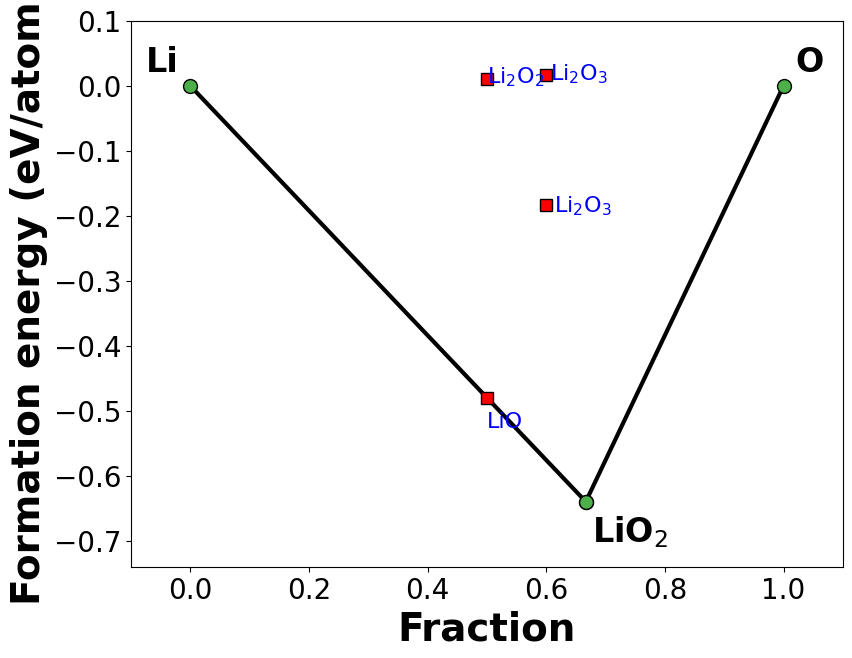

In [20]:
plotter.show()

In [22]:
import collections

data = collections.defaultdict(list)
for e in entries:
    decomp, ehull = pd.get_decomp_and_e_above_hull(e)
    print(decomp)

{PDEntry : Li1 with energy = -2.9588: 1.0}
{PDEntry : Li1 O2 with energy = -4.8764: 0.5, PDEntry : Li1 with energy = -2.9588: 0.5}
{PDEntry : Li1 O2 with energy = -4.8764: 0.75, PDEntry : Li1 with energy = -2.9588: 0.25}
{PDEntry : Li1 O2 with energy = -4.8764: 0.8999999999999999, PDEntry : Li1 with energy = -2.9588: 0.10000000000000009}
{PDEntry : Li1 O2 with energy = -4.8764: 0.75, PDEntry : Li1 with energy = -2.9588: 0.25}
{PDEntry : Li1 O2 with energy = -4.8764: 1.0}
{PDEntry : Li1 O2 with energy = -4.8764: 0.8999999999999999, PDEntry : Li1 with energy = -2.9588: 0.10000000000000009}
{PDEntry : O1 (O) with energy = 0.0000: 1.0}
